# Prediction of Maternal Health Risk Using Machine Learning Algorithms 

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.tree as tr
import sklearn.datasets as dt
import sklearn.neighbors as ne 
import seaborn as sns
import pandas as pd
import time
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import sklearn.model_selection as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

# Data collection & preprocessing

In [2]:
# import dataset
health_risk = pd.read_csv('/Users/revathysurendran/Documents/ML/assignment/Maternal_Health_Risk.csv')
print('risk data:\n',health_risk)
print("Dataset Shape: ", health_risk.shape)
print('\n',health_risk.isnull().sum())

#calculate the number of data that belong to each class
health_inf = health_risk['RiskLevel'].value_counts()
print('\n',health_inf)

x = health_risk.drop("RiskLevel", axis=1)
y = health_risk["RiskLevel"]
print('\nx:\n',x)
print('\ny:\n',y)

risk data:
       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]
Dataset Shape:  (1014, 7)

 Age            0
SystolicBP     0
DiastolicBP    0
BS      

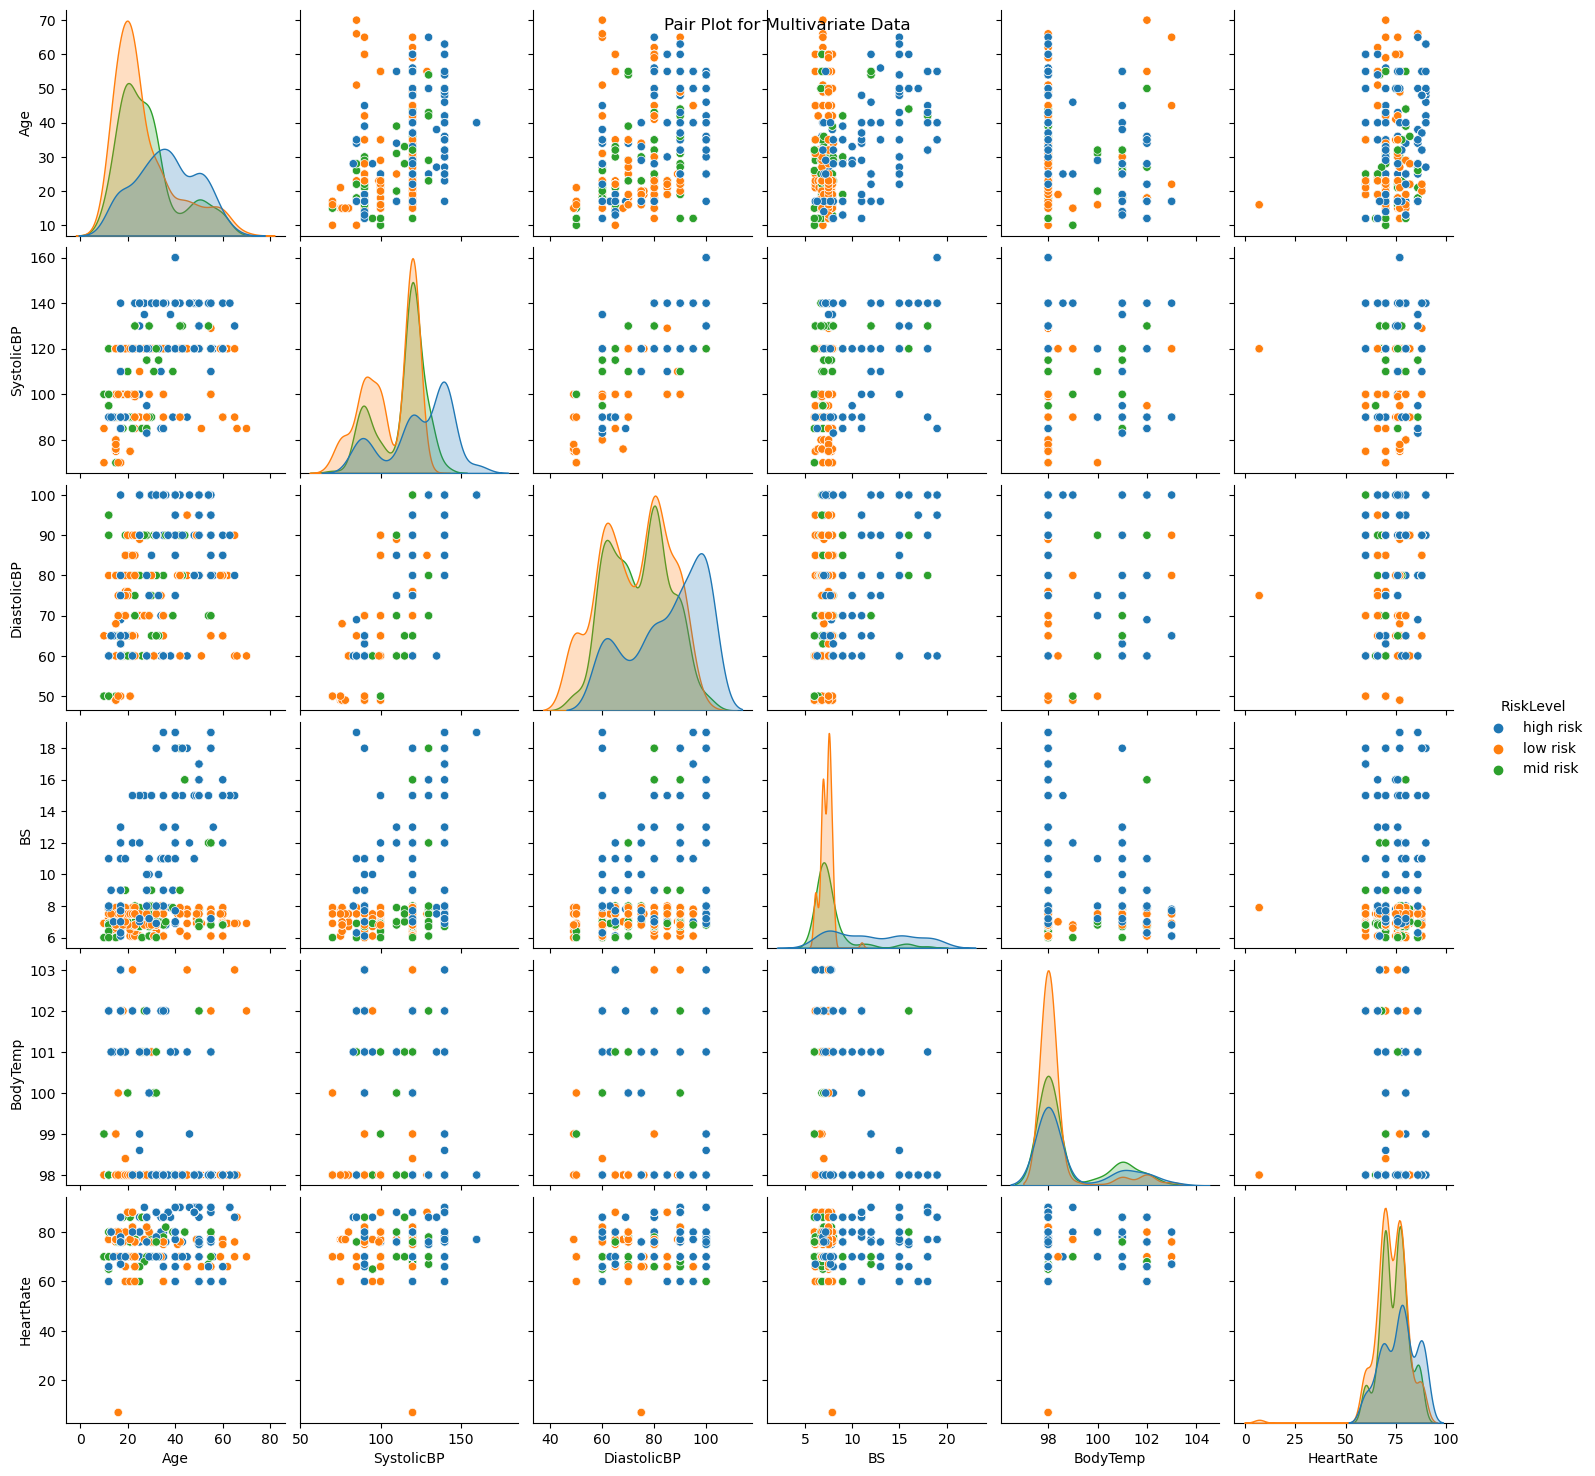

In [3]:
# Pair plot
sns.pairplot(health_risk, hue='RiskLevel')
plt.suptitle('Pair Plot for Multivariate Data')
plt.show()

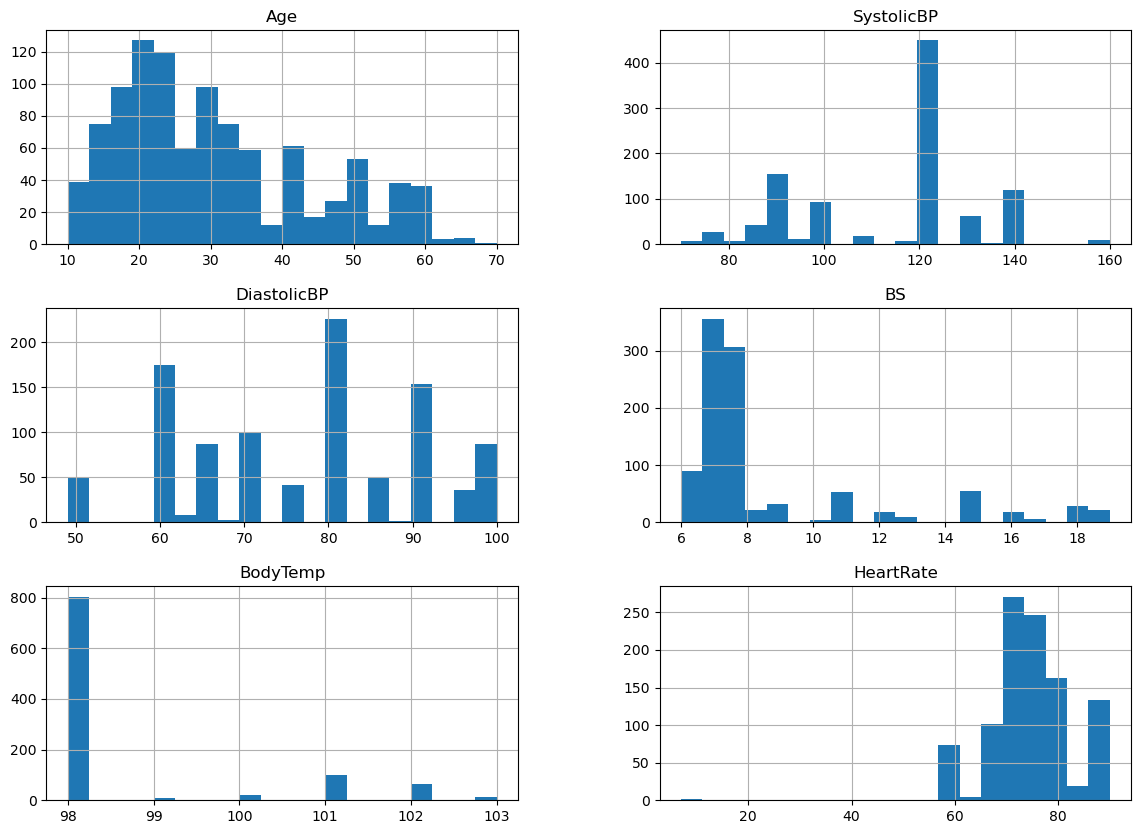

In [4]:
# Histograms
health_risk.hist(bins=20, figsize=(14, 10))
plt.show()

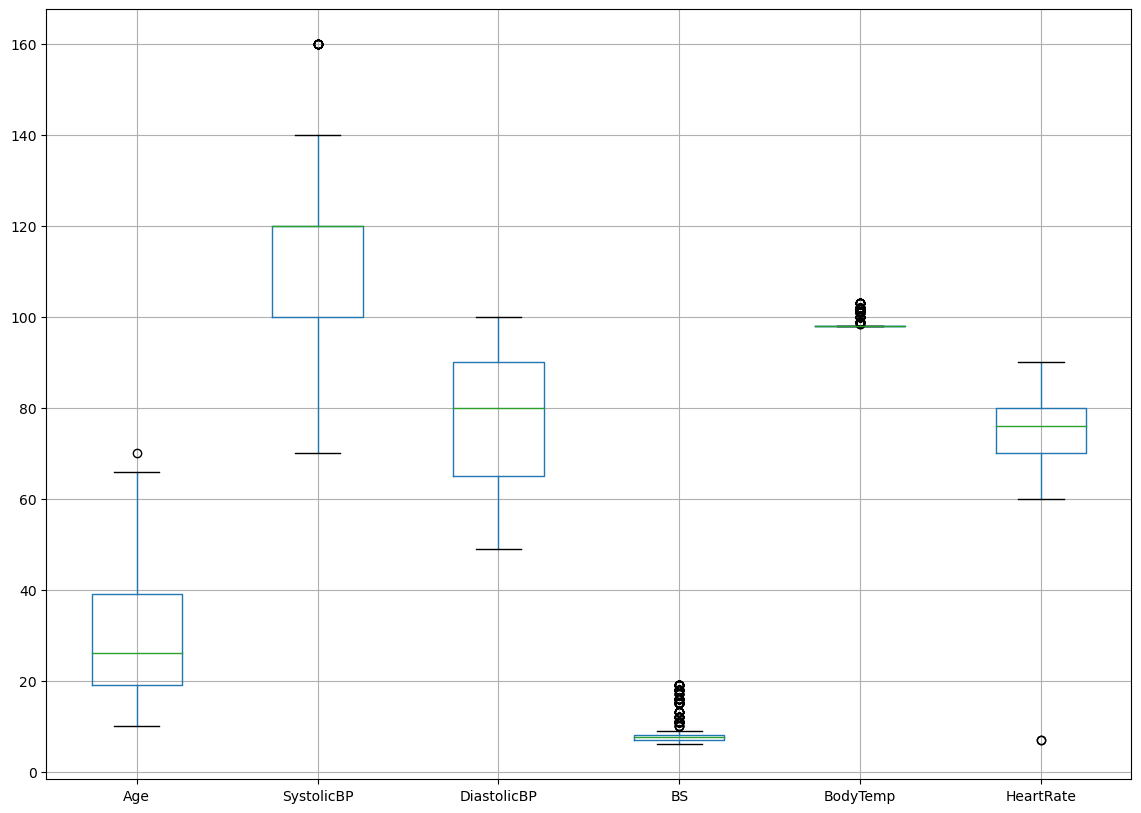

In [5]:
# Box plot
health_risk.boxplot(figsize=(14, 10))
plt.show()

[0 0 0 ... 0 0 2]


Text(0.5, 1.0, 'Correlation heatmap')

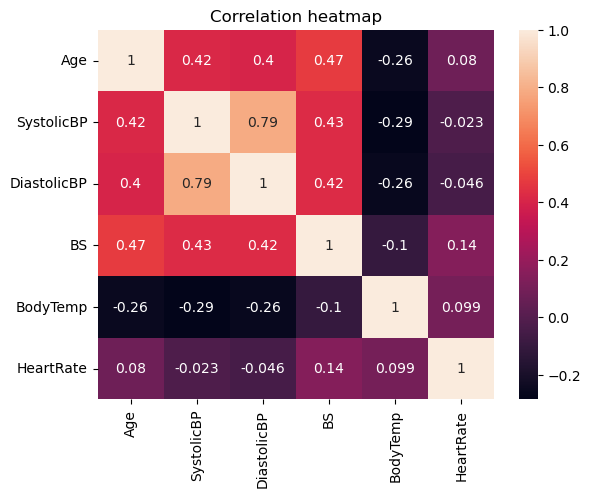

In [6]:
#Categorical Feature Encoding
le = LabelEncoder()
label = le.fit_transform(health_risk['RiskLevel'])
health_risk.drop("RiskLevel", axis=1, inplace=True) #high-0 low-1 mid-2
y = label
print(y)

#Create the correlations dataframe
corr = health_risk.corr()
#Plot the heatmap using the correlations dataframe
sns.heatmap(data=corr, annot=True)
plt.title('Correlation heatmap')  

In [7]:
# standardization of dependent variables
scale= StandardScaler()
x = scale.fit_transform(x) 
print('\nx:',x)
print('\ny:',y)

# spliting into 80:20 ration  
x_tr, x_tes, y_tr, y_tes = train_test_split(x, y, test_size = 0.2, random_state = 20)  
# describes information about train and test set  
print("\nx train dataset: ", x_tr.shape)  
print("y train dataset: ", y_tr.shape)  
print("x test dataset: ", x_tes.shape)  
print("y test dataset: ", y_tes.shape) 


x: [[-0.36173812  0.91339632  0.25502279  1.90589019 -0.4852155   1.44695615]
 [ 0.38077697  1.45702716  0.97553854  1.29833966 -0.4852155  -0.53208757]
 [-0.06473208 -1.26112705 -0.46549297 -0.22053665  0.97388449  0.70481475]
 ...
 [ 0.38077697 -1.53294248 -1.18600873  3.12099124 -0.4852155   1.44695615]
 [ 0.97478904  0.36976548  0.97553854  2.81721597 -0.4852155  -0.53208757]
 [ 0.15802244  0.36976548 -0.82575085 -0.82808717  1.70343448  0.21005383]]

y: [0 0 0 ... 0 0 2]

x train dataset:  (811, 6)
y train dataset:  (811,)
x test dataset:  (203, 6)
y test dataset:  (203,)


# Classification Models

# KNN

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        58
           1       1.00      0.85      0.92        87
           2       0.80      0.88      0.84        58

    accuracy                           0.90       203
   macro avg       0.90      0.91      0.90       203
weighted avg       0.91      0.90      0.90       203

KNN Accuracy: 0.9220907297830375
Train Accuracy: 0.9273
Test Accuracy: 0.9015
Highrisk accuracy: 1.00000
Lowrisk accuracy: 0.85057
Midrisk accuracy: 0.87931
Time taken: 8.821487426757812e-06


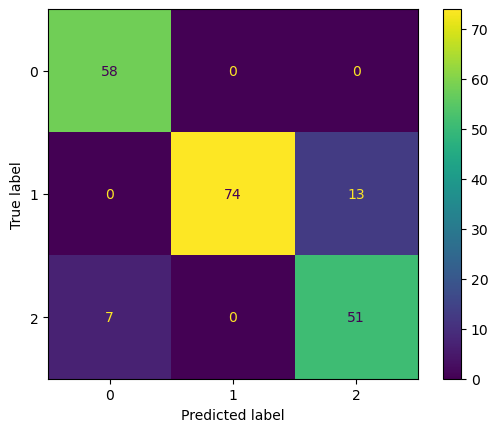

In [8]:
KNN=ne.KNeighborsClassifier(n_neighbors=3,  weights='distance')
KNN.fit(x,y)
ytespredictions = KNN.predict(x_tes) 
ytrpredictions = KNN.predict(x_tr)
# print classifications report  
print(classification_report(y_tes, ytespredictions)) 
Acc=KNN.score(x,y)
print('KNN Accuracy:',Acc)

# Create the confusion matrix
#labels - highrisk 0 lowrisk 1 midrisk 2
cm = confusion_matrix(y_tes, ytespredictions, labels=[0,1,2])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(); 

# Calculate accuracies
class1_accuracy = (cm[0, 0] / float(np.sum(cm[0, :])))
class2_accuracy = (cm[1, 1] / float(np.sum(cm[1, :])))
class3_accuracy = (cm[2, 2] / float(np.sum(cm[2, :])))
train_accuracy = accuracy_score(y_tr, ytrpredictions)
test_accuracy = accuracy_score(y_tes, ytespredictions)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print('Highrisk accuracy: %.5f' % class1_accuracy)
print('Lowrisk accuracy: %.5f' % class2_accuracy)
print('Midrisk accuracy: %.5f' % class3_accuracy)
start = time.time()
elapsed_time = (time.time()-start)
print("Time taken:", elapsed_time)

Train Accuracy: [0.654747225647349, 0.6288532675709001, 0.6202219482120839, 0.6226880394574599, 0.625154130702836, 0.6387176325524044, 0.6337854500616523, 0.6522811344019729, 0.6263871763255241, 0.6103575832305795, 0.5980271270036991, 0.6004932182490752, 0.5980271270036991, 0.625154130702836, 0.6226880394574599, 0.6115906288532675, 0.5881627620221949, 0.5967940813810111, 0.591861898890259, 0.5869297163995068]

Test Accuracy: [0.9802955665024631, 0.8768472906403941, 0.8226600985221675, 0.8029556650246306, 0.7881773399014779, 0.7783251231527094, 0.7635467980295566, 0.7487684729064039, 0.7339901477832512, 0.7339901477832512, 0.7192118226600985, 0.7142857142857143, 0.7241379310344828, 0.7192118226600985, 0.7487684729064039, 0.7093596059113301, 0.7044334975369458, 0.7093596059113301, 0.6995073891625616, 0.6896551724137931]


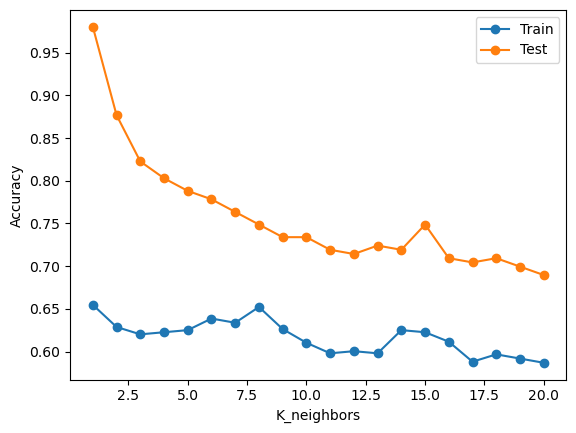

In [23]:
Acc_tr=[]
Acc_tes=[]
MD=[]
for i in range(1,21):
    KNN=ne.KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_tr,y_tr)
    KNN.fit(x_tes,y_tes)
    Acc_tr.append(KNN.score(x_tr,y_tr))
    Acc_tes.append(KNN.score(x_tes,y_tes))
    MD.append(i)
print('Train Accuracy:',Acc_tr)
print('\nTest Accuracy:',Acc_tes)
#print(MD)  
# Visulaize ACC
plt.figure()
plt.plot(MD, Acc_tr, label='Train',marker='o')
plt.plot(MD, Acc_tes, label='Test',marker='o')
plt.xlabel('K_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

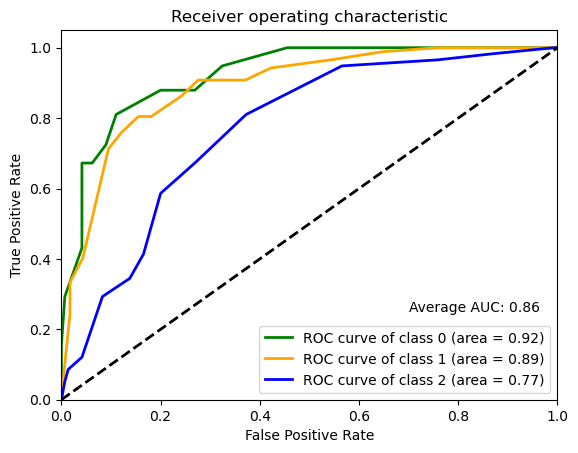

In [10]:
# ROC curve and AUC for KNN
y_test_binarized = label_binarize(y_tes, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
thresh = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], KNN.predict_proba(x_tes)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
average_auc = np.mean(list(roc_auc.values()))

plt.figure()
colors = cycle(['green', 'orange', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.text(0.7, 0.25, 'Average AUC: {:.2f}'.format(average_auc))
plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        58
           1       0.88      0.86      0.87        87
           2       0.75      0.76      0.75        58

    accuracy                           0.84       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203

Random Forest Accuracy: 0.8423645320197044
Train Accuracy: 0.8964
Test Accuracy: 0.8424
Highrisk accuracy: 0.89655
Lowrisk accuracy: 0.86207
Midrisk accuracy: 0.75862
Time taken: 7.867813110351562e-06


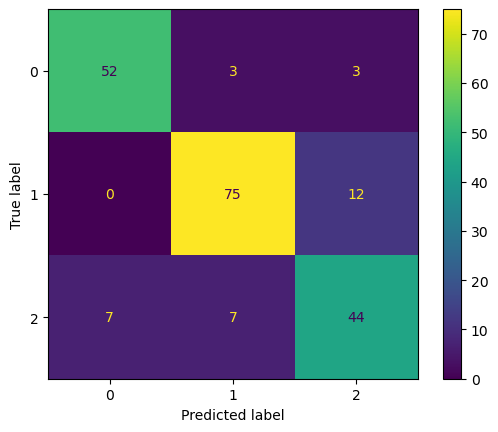

In [24]:
rf = RandomForestClassifier(n_estimators=250, max_depth=10)
rf.fit(x_tr, y_tr)
ytespredictions = rf.predict(x_tes)
ytrpredictions = rf.predict(x_tr)
accuracy = accuracy_score(y_tes, ytespredictions)
print(classification_report(y_tes, ytespredictions)) 

# Create the confusion matrix
cm = confusion_matrix(y_tes, ytespredictions, labels=[0,1,2])
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

class1_accuracy = (cm[0, 0] / float(np.sum(cm[0, :])))
class2_accuracy = (cm[1, 1] / float(np.sum(cm[1, :])))
class3_accuracy = (cm[2, 2] / float(np.sum(cm[2, :])))
train_accuracy = accuracy_score(y_tr, ytrpredictions)
test_accuracy = accuracy_score(y_tes, ytespredictions)

print("Random Forest Accuracy:", accuracy)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print('Highrisk accuracy: %.5f' % class1_accuracy)
print('Lowrisk accuracy: %.5f' % class2_accuracy)
print('Midrisk accuracy: %.5f' % class3_accuracy)
start = time.time()
elapsed_time = (time.time()-start)
print("Time taken:", elapsed_time)

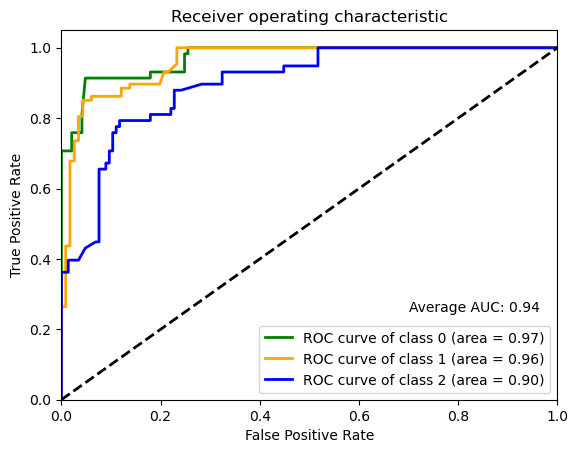

In [12]:
# ROC curve and ROC AUC for Random Forest
y_test_binarized = label_binarize(y_tes, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
thresh = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], rf.predict_proba(x_tes)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
average_auc = np.mean(list(roc_auc.values()))

plt.figure()
colors = cycle(['green', 'orange', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.text(0.7, 0.25, 'Average AUC: {:.2f}'.format(average_auc))
plt.show()

# Gradient Boosting

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        58
           1       0.90      0.82      0.86        87
           2       0.68      0.74      0.71        58

    accuracy                           0.82       203
   macro avg       0.81      0.82      0.81       203
weighted avg       0.82      0.82      0.82       203

GBC accuracy is 0.82
Train Accuracy: 0.9051
Test Accuracy: 0.8177
Highrisk accuracy: 0.89655
Lowrisk accuracy: 0.81609
Midrisk accuracy: 0.74138
Time taken: 9.059906005859375e-06


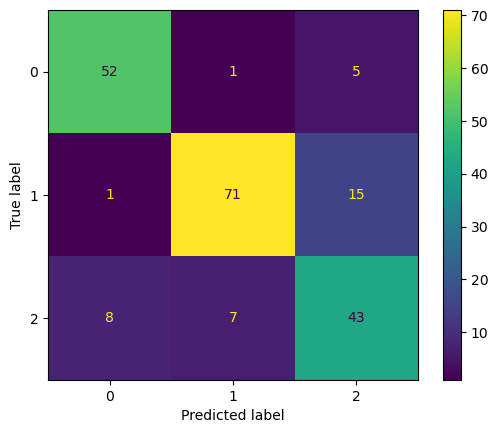

In [25]:
gbc=GradientBoostingClassifier(learning_rate=0.2)
# Fit train data to GBC
gbc.fit(x_tr,y_tr)
ytespredictions = gbc.predict(x_tes) # 82%
ytrpredictions = gbc.predict(x_tr)
print(classification_report(y_tes, ytespredictions))

# Create the confusion matrix
cm = confusion_matrix(y_tes, ytespredictions, labels=[0,1,2])
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

class1_accuracy = (cm[0, 0] / float(np.sum(cm[0, :])))
class2_accuracy = (cm[1, 1] / float(np.sum(cm[1, :])))
class3_accuracy = (cm[2, 2] / float(np.sum(cm[2, :])))
train_accuracy = accuracy_score(y_tr, ytrpredictions)
test_accuracy = accuracy_score(y_tes, ytespredictions)

# Accuracy of model
print("GBC accuracy is %2.2f" % accuracy_score( 
     y_tes, gbc.predict(x_tes)))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print('Highrisk accuracy: %.5f' % class1_accuracy)
print('Lowrisk accuracy: %.5f' % class2_accuracy)
print('Midrisk accuracy: %.5f' % class3_accuracy)
start = time.time()
elapsed_time = (time.time()-start)
print("Time taken:", elapsed_time)

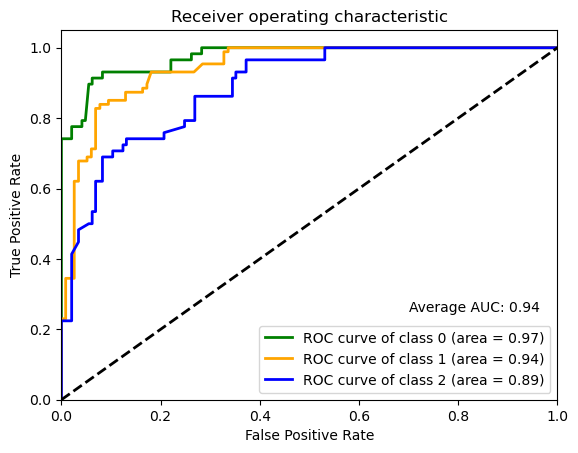

In [14]:
# ROC curve and AUC for GBC
y_test_binarized = label_binarize(y_tes, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
thresh = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], gbc.predict_proba(x_tes)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
average_auc = np.mean(list(roc_auc.values()))    

plt.figure()
colors = cycle(['green', 'orange', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.text(0.7, 0.25, 'Average AUC: {:.2f}'.format(average_auc))
plt.show()

# XGBoost 

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        58
           1       0.90      0.85      0.88        87
           2       0.75      0.76      0.75        58

    accuracy                           0.84       203
   macro avg       0.83      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203

XGBoost Accuracy : 0.8423645320197044
Train Accuracy: 0.9112
Test Accuracy: 0.8424
Highrisk accuracy: 0.91379
Lowrisk accuracy: 0.85057
Midrisk accuracy: 0.75862
Time taken: 1.0013580322265625e-05


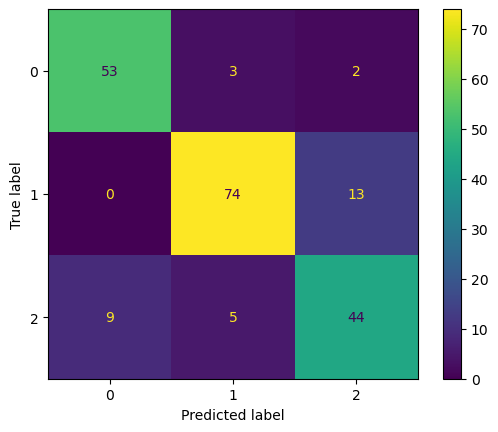

In [27]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.1)
xgb.fit(x_tr, y_tr)
ytespredictions = xgb.predict(x_tes)
ytrpredictions = xgb.predict(x_tr)
report_xgb = classification_report(y_tes, ytespredictions)
print(report_xgb)

# Calculate the accuracy
accuracy_xgb = accuracy_score(y_tes, ytespredictions)
# Create the confusion matrix
cm = confusion_matrix(y_tes, ytespredictions, labels=[0, 1, 2])
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

class1_accuracy = (cm[0, 0] / float(np.sum(cm[0, :])))
class2_accuracy = (cm[1, 1] / float(np.sum(cm[1, :])))
class3_accuracy = (cm[2, 2] / float(np.sum(cm[2, :])))
train_accuracy = accuracy_score(y_tr, ytrpredictions)
test_accuracy = accuracy_score(y_tes, ytespredictions)

print('XGBoost Accuracy :',accuracy_xgb)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print('Highrisk accuracy: %.5f' % class1_accuracy)
print('Lowrisk accuracy: %.5f' % class2_accuracy)
print('Midrisk accuracy: %.5f' % class3_accuracy)
start = time.time()
elapsed_time = (time.time()-start)
print("Time taken:", elapsed_time)

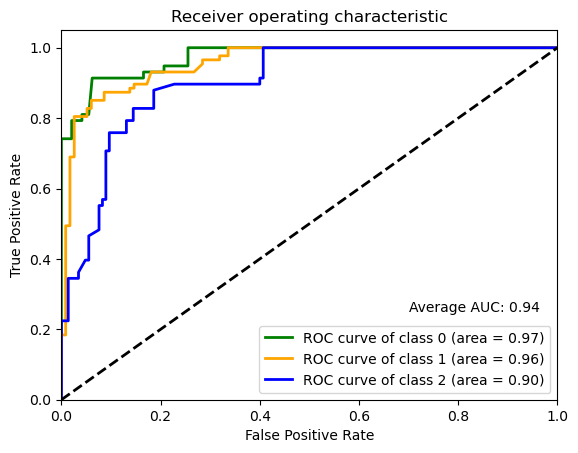

In [16]:
# ROC curve and AUC for XGBoost
y_test_binarized = label_binarize(y_tes, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
thresh = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], xgb.predict_proba(x_tes)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
average_auc = np.mean(list(roc_auc.values())) 
    
plt.figure()
colors = cycle(['green', 'orange', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.text(0.7, 0.25, 'Average AUC: {:.2f}'.format(average_auc))
plt.show()

# Model Comparison

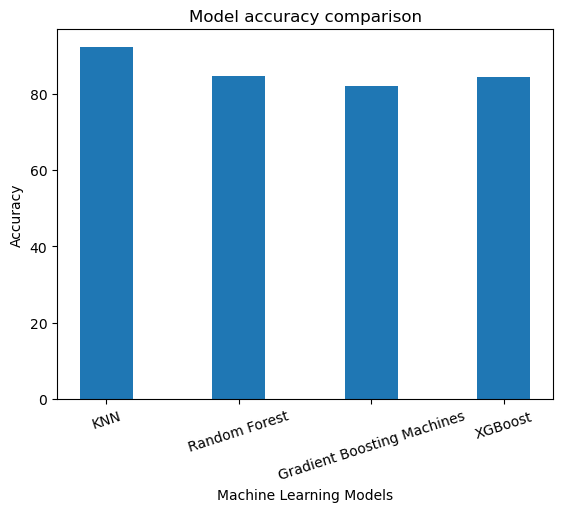

In [17]:
models = ['KNN','Random Forest','Gradient Boosting Machines','XGBoost']
acc = [92.2,84.72,82,84.23]
# creating the bar plot
plt.bar(models, acc, width = 0.4)
 
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Model accuracy comparison")
plt.xticks(rotation=18)
plt.show()

# Cross validation

# KNN

In [18]:
from sklearn.model_selection import cross_val_score, KFold
knn = ne.KNeighborsClassifier(n_neighbors=3, weights='distance')
num_folds = 5
kf = KFold(n_splits=num_folds)
cross_val_results = cross_val_score(knn, x, y, cv=kf)
print(f'K-NN Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')
print(f'Variance: {cross_val_results.var()}')
start = time.time()
elapsed_time = (time.time()-start)
print("Time taken:", elapsed_time)

K-NN Cross-Validation Results (Accuracy): [0.83743842 0.75862069 0.83251232 0.85714286 0.87623762]
Mean Accuracy: 0.8323903818953324
Variance: 0.0016005461473383993
Time taken: 1.1920928955078125e-05


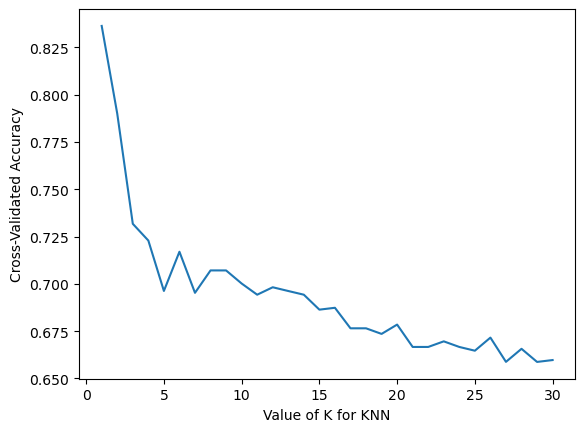

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = ne.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# random forest

In [20]:
rf = RandomForestClassifier(n_estimators=250, max_depth=10)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=20)
cross_val_results = cross_val_score(rf, x, y, cv=kf)
print(f'RF Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')
print(f'Variance: {cross_val_results.var()}')
start = time.time()
elapsed_time = (time.time()-start)
print("Time taken:", elapsed_time)

RF Cross-Validation Results (Accuracy): [0.85714286 0.74876847 0.82758621 0.81280788 0.78712871]
Mean Accuracy: 0.8066868263180998
Variance: 0.0013514235877118356
Time taken: 1.0967254638671875e-05


# gradient boosting

In [21]:
gbc=GradientBoostingClassifier(learning_rate=0.2)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=20)
cross_val_results = cross_val_score(gbc, x, y, cv=kf)
print(f'GBM Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')
print(f'Variance: {cross_val_results.var()}')
start = time.time()
elapsed_time = (time.time()-start)
print("Time taken:", elapsed_time)

GBM Cross-Validation Results (Accuracy): [0.81773399 0.74384236 0.84236453 0.85714286 0.7970297 ]
Mean Accuracy: 0.8116226893625322
Variance: 0.0015723244495937645
Time taken: 9.059906005859375e-06


# xgboost

In [22]:
xgb = XGBClassifier(learning_rate=0.1)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=20)
cross_val_results = cross_val_score(xgb, x, y, cv=kf)
print(f'XGB Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')
print(f'Variance: {cross_val_results.var()}')
start = time.time()
elapsed_time = (time.time()-start)
print("Time taken:", elapsed_time)

XGB Cross-Validation Results (Accuracy): [0.84236453 0.76847291 0.83743842 0.86206897 0.79207921]
Mean Accuracy: 0.8204848071013997
Variance: 0.0012015011173088892
Time taken: 1.0967254638671875e-05
